## Multi Linear regression Ï†ÅÏö© (investment Decision : multi linear regression Î∞©Î≤ï)
- Train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêú xgboostÎ°ú Test Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä -> Fully - PaidÎùºÍ≥† ÌôïÏã†ÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÎÇ®Í≤®ÎëîÎã§.
- Train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêú regression Î™®Îç∏Î°ú Fully - PaidÎùºÍ≥† ÌôïÏã†Ìïú Îç∞Ïù¥ÌÑ∞ regression ÏßÑÌñâ
- ÏÉÅÏúÑ 10% Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ portfolioÎ•º ÎßåÎì†Îã§.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
print(device)

cuda


In [21]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_train.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_test.csv"
test_data = pd.read_csv(test_data_path)

In [4]:
#Fake dataset
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/return_feature/return_feature_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

In [4]:
data.columns

Index(['last_fico_range_high', 'mo_sin_old_rev_tl_op', 'int_rate',
       'annual_inc', 'dti', 'installment', 'zip_code', 'revol_util',
       'fico_range_low', 'total_rev_hi_lim', 'revol_bal', 'bc_util',
       'avg_cur_bal', 'total_il_high_credit_limit', 'grade', 'total_pymnt',
       'total_pymnt_inv', 'loan_amnt', 'credit_history_years', 'term_months',
       'loan_status'],
      dtype='object')

In [22]:
keep_features = ['grade', 'term_months', 'total_pymnt', 'total_pymnt_inv']

data_classification = data.copy()
test_classification = test_data.copy()

data_classification = data_classification.drop(columns = keep_features)
test_classification = test_classification.drop(columns = keep_features)

In [23]:
data_x = data_classification.drop(columns='loan_status')
data_y = data_classification[['loan_status']]

X_test = test_classification.drop(columns='loan_status')
y_test = test_classification[['loan_status']]

In [19]:
data_y.value_counts()

loan_status
0              898669
1              217789
Name: count, dtype: int64

In [20]:
y_test.value_counts()

loan_status
0              599114
1              145192
Name: count, dtype: int64

In [24]:
# data under 6:2:2 train,val,test set
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=42, stratify=data_y)

print(f"Train size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data):.1%})")
print(f"Validation size: {X_val.shape[0]} samples ({X_val.shape[0]/len(data):.1%})")
print(f"Test size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data):.1%})")

Train size: 893166 samples (80.0%)
Validation size: 223292 samples (20.0%)
Test size: 744306 samples (66.7%)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#pos, neg = y_test.value_counts()  # ‚úÖ `.values`Î°ú NumPy Î∞∞Ïó¥ Î≥ÄÌôò
#scale_pos_weight = neg / pos  # ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í≥ÑÏÇ∞

# 1Ô∏è‚É£ XGBoost Î™®Îç∏ Ï†ïÏùò
model_base = XGBClassifier(
    #scale_pos_weight=scale_pos_weight, 
    n_estimators=1000,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

[0]	validation_0-logloss:0.49195	validation_1-logloss:0.49198
[1]	validation_0-logloss:0.48735	validation_1-logloss:0.48740
[2]	validation_0-logloss:0.48287	validation_1-logloss:0.48294
[3]	validation_0-logloss:0.47852	validation_1-logloss:0.47860
[4]	validation_0-logloss:0.47427	validation_1-logloss:0.47438
[5]	validation_0-logloss:0.47013	validation_1-logloss:0.47026
[6]	validation_0-logloss:0.46610	validation_1-logloss:0.46624
[7]	validation_0-logloss:0.46217	validation_1-logloss:0.46233
[8]	validation_0-logloss:0.45833	validation_1-logloss:0.45851
[9]	validation_0-logloss:0.45459	validation_1-logloss:0.45478
[10]	validation_0-logloss:0.45093	validation_1-logloss:0.45114
[11]	validation_0-logloss:0.44735	validation_1-logloss:0.44758
[12]	validation_0-logloss:0.44386	validation_1-logloss:0.44411
[13]	validation_0-logloss:0.44044	validation_1-logloss:0.44071
[14]	validation_0-logloss:0.43710	validation_1-logloss:0.43738
[15]	validation_0-logloss:0.43384	validation_1-logloss:0.43413
[1

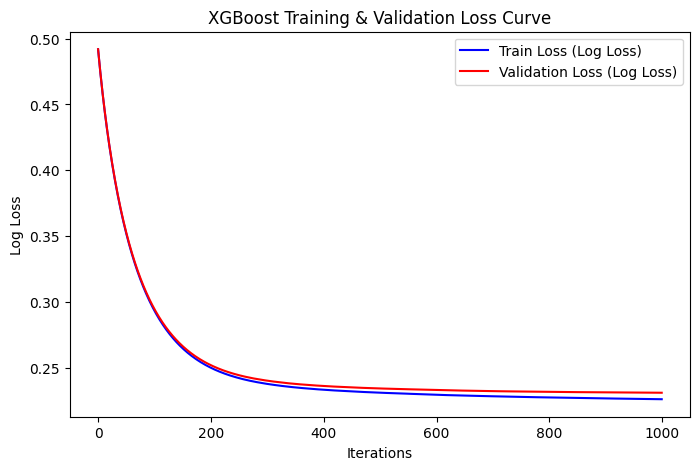

üîπ Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    599114
           1       0.74      0.75      0.75    145192

    accuracy                           0.90    744306
   macro avg       0.84      0.84      0.84    744306
weighted avg       0.90      0.90      0.90    744306



In [26]:
model_base.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
    verbose=True
)

# 3Ô∏è‚É£ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Îêú Train & Validation Loss Í∞ÄÏ†∏Ïò§Í∏∞
evals_result = model_base.evals_result()  # üîπ Î≥ÄÍ≤ΩÎêú ÏΩîÎìú (ÌïôÏäµ ÌõÑ Í≤∞Í≥º ÌôïÏù∏)
train_loss = evals_result['validation_0']['logloss']  # Training Loss
val_loss = evals_result['validation_1']['logloss']    # Validation Loss

# 4Ô∏è‚É£ Train & Validation Loss ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss (Log Loss)', color='blue')
plt.plot(val_loss, label='Validation Loss (Log Loss)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training & Validation Loss Curve')
plt.legend()
plt.show()

# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_test)
y_prob = model_base.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# üîπ Classification Report Ï∂úÎ†•
print("üîπ Classification Report:")
print(classification_report(y_test, y_pred))

In [28]:
##Base MethodÏóêÏÑú test_regression set Î™®ÏúºÍ∏∞.
fully_paid_indices = (y_pred == 0)

test_regression = test_data[fully_paid_indices]

test_regression['return'] = (test_regression['total_pymnt_inv'] - test_regression['loan_amnt'])/test_regression['loan_amnt']
test_regression['return'].head(10)
#len(test_regression)

0     0.000939
2     0.147130
4     0.169867
5     0.596440
6     0.122451
7     0.029183
9     0.053438
11    0.184979
12    0.236543
13    0.198769
Name: return, dtype: float64

In [30]:
train_regression = data.copy()
train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['loan_amnt'])/train_regression['loan_amnt']

In [ ]:
##drop feature
drop_features = ['loan_status', 'total_pymnt_inv', 'total_pymnt', 'grade', 'term_months']

train_regression = train_regression.drop(columns=drop_features)
test_regression = test_regression.drop(columns=drop_features)

In [32]:
data_x = train_regression.drop(columns='return')
data_y = train_regression[['return']]

test_x = test_regression.drop(columns = 'return')
test_y = test_regression[['return']]

In [33]:
scaler = StandardScaler()

data_x_scaled = scaler.fit_transform(data_x)

X_train = data_x_scaled
y_train = data_y

test_x_scaled = scaler.transform(test_x)

### Multi - Linear regression

In [34]:
from sklearn.linear_model import Ridge,Lasso, ElasticNet

reg = LinearRegression()
#reg = Ridge(alpha=0.8)
#reg = Lasso(alpha=5)
reg.fit(X_train, y_train)

#print(reg.coef_)
y_pred = reg.predict(test_x_scaled)

print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
print("R¬≤:", r2_score(test_y, y_pred))

test_regression['predicted_return'] = reg.predict(test_x_scaled)

top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))


RMSE: 0.19423627302025126
R¬≤: -0.0002052464078345917


In [62]:
y_train.head()

return
0   647.68
1  3441.12
2   559.08
3 -4665.08
4  1769.51

In [35]:
top_10_percent.head()

last_fico_range_high  mo_sin_old_rev_tl_op  int_rate  annual_inc  \
118270                 844.0                 270.0    0.2170     80000.0   
252198                 659.0                 186.0    0.1249     45000.0   
506401                 834.0                 199.0    0.2589    165000.0   
58016                  834.0                 197.0    0.2350     69000.0   
465870                 844.0                 108.0    0.2220     92000.0   

          dti  installment  zip_code  revol_util  fico_range_low  \
118270  11.78       164.70     470.0       0.884           675.0   
252198  14.67       117.08     918.0       8.923           695.0   
506401   1.90       756.60     330.0       0.973           660.0   
58016   10.24       444.27     923.0       0.962           665.0   
465870   5.99       665.59     960.0       0.909           665.0   

        total_rev_hi_lim  revol_bal    bc_util  avg_cur_bal  \
118270           23500.0    20782.0  88.400000      22004.0   
252198             300.0     2677.0  58.157757       2834.0   
506401            8200.0     7976.0  97.200000       1595.0   
58016            14900.0    14330.0  96.200000       6846.0   
465870           15600.0    14177.0  95.800000      30079.0   

        total_il_high_credit_limit  loan_amnt  credit_history_years    return  \
118270                      5000.0     6000.0                    22  0.629347   
252198                     25644.0     3500.0                    16  0.127046   
506401                         0.0    25325.0                    16  0.803952   
58016                      29331.0    15600.0                    16  0.568884   
465870                         0.0    24000.0                    21  0.537528   

        predicted_return  
118270          0.500053  
252198          0.496350  
506401          0.493524  
58016           0.485926  
465870          0.479123

## Portfolio Íµ¨ÏÑ±

In [37]:
portfolio = test_data.loc[top_10_percent.index].copy()

portfolio['actual_return'] = (portfolio['total_pymnt_inv'] - portfolio['loan_amnt'])/portfolio['loan_amnt']*100

mean_return = portfolio['actual_return'].mean()

std_return = portfolio['actual_return'].std()

sharpe_ratio = mean_return / std_return if std_return != 0 else np.nan

print(f"Average rate of return : {mean_return:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Average rate of return : 18.4155
Sharpe Ratio: 1.4197


# Í∞Å MethodÎ≥Ñ multi - lineara regressionÏùÑ ÌÜµÌïú portfolio ÏûëÏÑ±

In [47]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_train.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_test.csv"
test_data = pd.read_csv(test_data_path)

#Fake dataset
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/return_feature/return_feature_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

In [48]:
keep_features = ['grade', 'term_months', 'total_pymnt', 'total_pymnt_inv']

data_classification = data.copy()
test_classification = test_data.copy()
fake_Classification = fake.copy()

data_classification = data_classification.drop(columns = keep_features)
test_classification = test_classification.drop(columns = keep_features)
fake_Classification = fake_Classification.drop(columns = keep_features)

In [49]:
from imblearn.over_sampling import SMOTE
drop2 = ['loan_status', 'return']

def select_fully_paid(y_pred, method):
    scaler = StandardScaler()
    reg = LinearRegression()

    fully_paid_indices = (y_pred == 0)
    test_regression = test_data[fully_paid_indices]
    test_regression['return'] = (test_regression['total_pymnt_inv'] - test_regression['loan_amnt'])/test_regression['loan_amnt']

    train_regression = data.copy()

    if method == 'Base':
        train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['loan_amnt'])/train_regression['loan_amnt']

        drop_features = ['loan_status', 'total_pymnt_inv', 'total_pymnt', 'grade', 'term_months']
        train_regression = train_regression.drop(columns=drop_features)
        test_regression = test_regression.drop(columns=drop_features)

        data_x = train_regression.drop(columns='return')
        data_y = train_regression[['return']]

        test_x = test_regression.drop(columns = 'return')
        test_y = test_regression[['return']]

        data_x_scaled = scaler.fit_transform(data_x)

        X_train = data_x_scaled
        y_train = data_y

        test_x_scaled = scaler.transform(test_x)

        reg.fit(X_train, y_train)

        #print(reg.coef_)
        y_pred = reg.predict(test_x_scaled)

        print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
        print("R¬≤:", r2_score(test_y, y_pred))

        test_regression['predicted_return'] = reg.predict(test_x_scaled)

        top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))
        return method, top_10_percent
    
    elif method == 'Undersampling':
        train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['loan_amnt'])/train_regression['loan_amnt']
        drop_features = ['total_pymnt_inv', 'total_pymnt', 'grade', 'term_months']
        train_regression = train_regression.drop(columns=drop_features)
        test_regression = test_regression.drop(columns=drop_features)

        X_train = train_regression.drop(columns='loan_status')
        y_train = train_regression[['loan_status']]

        undersampler = RandomUnderSampler(random_state=42)
        X_under, y_under = undersampler.fit_resample(X_train, y_train)

        data_under = pd.concat([pd.DataFrame(X_under, columns=X_train.columns), pd.DataFrame(y_under, columns=['loan_status'])], axis=1)

        data_x = data_under.drop(columns=drop2)  
        data_y = data_under[['return']]  

        test_x = test_regression.drop(columns = drop2)
        test_y = test_regression[['return']]

        data_x_scaled = scaler.fit_transform(data_x)

        X_train = data_x_scaled
        y_train = data_y

        test_x_scaled = scaler.transform(test_x)

        reg.fit(X_train, y_train)

        #print(reg.coef_)
        y_pred = reg.predict(test_x_scaled)

        print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
        print("R¬≤:", r2_score(test_y, y_pred))

        test_regression['predicted_return'] = reg.predict(test_x_scaled)

        top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))

        return method, top_10_percent
    
    elif method == 'SMOTE':
        train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['loan_amnt'])/train_regression['loan_amnt']
        drop_features = ['total_pymnt_inv', 'total_pymnt', 'grade', 'term_months']
        train_regression = train_regression.drop(columns=drop_features)
        test_regression = test_regression.drop(columns=drop_features)

        X_train = train_regression.drop(columns='loan_status')
        y_train = train_regression[['loan_status']]

        smote = SMOTE(random_state=42)

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        augmentation_data = pd.concat([X_train_smote, y_train_smote], axis = 1)
        data_x = augmentation_data.drop(columns=drop2)
        data_y = augmentation_data[['return']]

        test_x = test_regression.drop(columns = drop2)
        test_y = test_regression[['return']]

        data_x_scaled = scaler.fit_transform(data_x)

        X_train = data_x_scaled
        y_train = data_y

        test_x_scaled = scaler.transform(test_x)

        reg.fit(X_train, y_train)

        #print(reg.coef_)
        y_pred = reg.predict(test_x_scaled)

        print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
        print("R¬≤:", r2_score(test_y, y_pred))

        test_regression['predicted_return'] = reg.predict(test_x_scaled)
        top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))

        return method, top_10_percent
    
    elif method == 'table-gan':
        train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['loan_amnt'])/train_regression['loan_amnt']
        drop_features = ['loan_status', 'total_pymnt_inv', 'total_pymnt', 'grade', 'term_months']
        train_regression = train_regression.drop(columns=drop_features)
        test_regression = test_regression.drop(columns=drop_features)

        fake_regression = fake.copy()

        fake_regression['return'] = (fake_regression['total_pymnt_inv'] - fake_regression['loan_amnt'])/fake_regression['loan_amnt']
        fake_regression = fake_regression.drop(columns=drop_features)

        train_total = pd.concat([train_regression, fake_regression])

        data_x = train_total.drop(columns='return')
        data_y = train_total[['return']]

        test_x = test_regression.drop(columns = 'return')
        test_y = test_regression[['return']]

        data_x_scaled = scaler.fit_transform(data_x)

        X_train = data_x_scaled
        y_train = data_y

        test_x_scaled = scaler.transform(test_x)

        reg.fit(X_train, y_train)

        #print(reg.coef_)
        y_pred = reg.predict(test_x_scaled)

        print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
        print("R¬≤:", r2_score(test_y, y_pred))

        test_regression['predicted_return'] = reg.predict(test_x_scaled)
        top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))

    return method, top_10_percent    

In [50]:
summary_with_sharpe = []

def linear_portfolio(Method, top_10_indices):
    selected = test_data.loc[top_10_indices.index].copy()
    returns = (selected['total_pymnt_inv'] - selected['loan_amnt']) / selected['loan_amnt']
    
    avg_return = returns.mean()
    std_return = returns.std()
    sharpe_ratio = avg_return / std_return if std_return != 0 else np.nan

    summary_with_sharpe.append({
        'Method': Method,
        'Average Return': avg_return * 100,
        'Std Dev': std_return,
        'Sharpe Ratio': sharpe_ratio
    }) 

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

def return_evaluation(model, data_x, data_y, X_test, y_test, method):
    print(f"Preprocessing method : {method}")

    if method == 'Base':
        X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2,
                                                           random_state=42, stratify=data_y)
        model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
        verbose=True
        )

        y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

        threshold = 0.5
        y_pred = (y_prob >= threshold).astype(int)


    elif method == 'Undersampling':
        X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.13, random_state=42, stratify=data_y)
        undersampler = RandomUnderSampler(random_state=42)
        X_under, y_under = undersampler.fit_resample(X_train, y_train)

        data_under = pd.concat([pd.DataFrame(X_under, columns=data_x.columns), pd.DataFrame(y_under, columns=['loan_status'])], axis=1)
        X_train = data_under.drop(columns=['loan_status'])  # Feature (ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞)
        y_train = data_under[['loan_status']]  # Target (ÌÉÄÍ≤ü Î≥ÄÏàò)

        model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
        verbose=True
        )
        y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

        threshold = 0.5
        y_pred = (y_prob >= threshold).astype(int)

    elif method == 'SMOTE':
        X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.33, random_state=42, stratify=data_y)

        smote = SMOTE(random_state=42)

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        augmentation_data = pd.concat([X_train_smote, y_train_smote], axis = 1)
        X_train = augmentation_data.drop(columns='loan_status')
        y_train = augmentation_data[['loan_status']]

        model.fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
            verbose=True
        )
        y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

        threshold = 0.5
        y_pred = (y_prob >= threshold).astype(int)
    
    elif method == 'table-gan':
        X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.33, random_state=42, stratify=data_y)
        train_dataset = pd.concat([X_train, y_train], axis=1)
        
        train_total = pd.concat([train_dataset,fake_Classification])
        train_total = shuffle(train_total, random_state=42)

        X_train = train_total.drop(columns='loan_status')
        y_train = train_total[['loan_status']]

        model.fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
            verbose=True
        )
        y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

        threshold = 0.5
        y_pred = (y_prob >= threshold).astype(int)
    
    #10% indexÎΩëÍ∏∞Í∏∞
    Method, top_10_indices = select_fully_paid(y_pred, method)

    #portfolio ÎßåÎì§Í∏∞Îì§Í∏∞
    linear_portfolio(Method, top_10_indices)

In [52]:
Methods = ['Base', 'Undersampling', 'SMOTE', 'table-gan']

X_test = test_classification.drop(columns='loan_status')
y_test = test_classification['loan_status']

returns_df = pd.DataFrame()

for method in Methods:
    data_x = data_classification.drop(columns='loan_status')
    data_y = data_classification['loan_status']

    model = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        objective='binary:logistic',
        eval_metric="logloss",
        random_state=42,
        verbosity=0
    )

    return_evaluation(model, data_x, data_y, X_test, y_test, method)

returns_with_sharpe_df = pd.DataFrame(summary_with_sharpe)

print(returns_with_sharpe_df.to_string(index=False))

Preprocessing method : Base
[0]	validation_0-logloss:0.49195	validation_1-logloss:0.49198
[1]	validation_0-logloss:0.48735	validation_1-logloss:0.48740
[2]	validation_0-logloss:0.48287	validation_1-logloss:0.48294
[3]	validation_0-logloss:0.47852	validation_1-logloss:0.47860
[4]	validation_0-logloss:0.47427	validation_1-logloss:0.47438
[5]	validation_0-logloss:0.47013	validation_1-logloss:0.47026
[6]	validation_0-logloss:0.46610	validation_1-logloss:0.46624
[7]	validation_0-logloss:0.46217	validation_1-logloss:0.46233
[8]	validation_0-logloss:0.45833	validation_1-logloss:0.45851
[9]	validation_0-logloss:0.45459	validation_1-logloss:0.45478
[10]	validation_0-logloss:0.45093	validation_1-logloss:0.45114
[11]	validation_0-logloss:0.44735	validation_1-logloss:0.44758
[12]	validation_0-logloss:0.44386	validation_1-logloss:0.44411
[13]	validation_0-logloss:0.44044	validation_1-logloss:0.44071
[14]	validation_0-logloss:0.43710	validation_1-logloss:0.43738
[15]	validation_0-logloss:0.43384	val

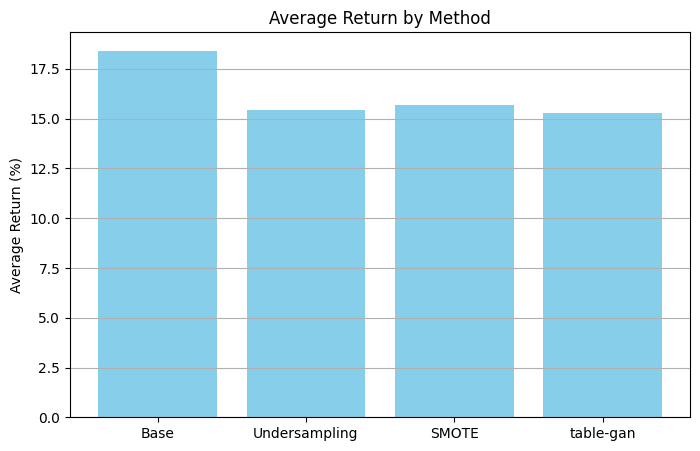

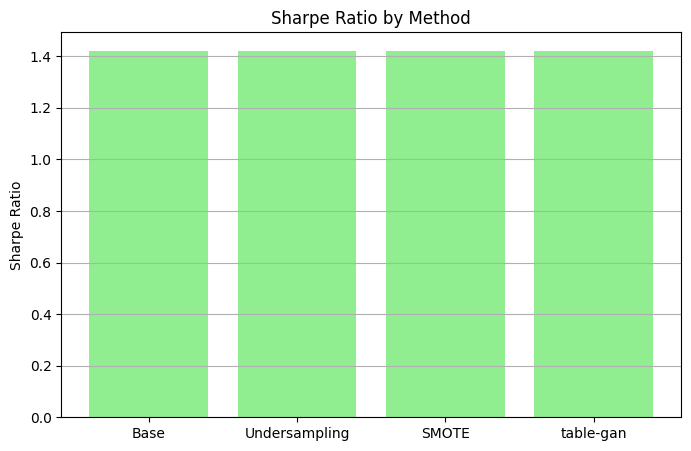

In [53]:
import matplotlib.pyplot as plt

methods = returns_with_sharpe_df['Method']
avg_returns = returns_with_sharpe_df['Average Return']
sharpe_ratios = returns_with_sharpe_df['Sharpe Ratio']

plt.figure(figsize=(8, 5))
plt.bar(methods, avg_returns, color='skyblue')
plt.ylabel("Average Return (%)")
plt.title("Average Return by Method")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(methods, sharpe_ratios, color='lightgreen')
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio by Method")
plt.grid(axis='y')
plt.show()
